# **Setup for Q3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/ML/Assignment4

In [ ]:
!unzip HW4_q3.zip

In [12]:
cp HW4_q3.zip detectron2_v0.1.1/

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git --branch v0.1.1 detectron2_v0.1.1

In [ ]:
cd /content/drive/MyDrive/ML/Assignment4/detectron2_v0.1.1/


In [ ]:
!git checkout -f db1614e

In [ ]:
!git status

In [ ]:
!sh configsQ3.sh

In [ ]:
!pip install -e .

In [ ]:
cp -r ../HW4_q3/ ./

In [1]:
cd /content/drive/MyDrive/ML/Assignment4/detectron2_v0.1.1/HW4_q3/

/content/drive/MyDrive/ML/Assignment4/detectron2_v0.1.1/HW4_q3


In [ ]:
!wget https://public.vinai.io/ContactHands.zip

In [ ]:
!unzip ContactHands.zip

In [ ]:
ls

In [20]:
mv ContactHands/ImageSets/Main/*.txt ContactHands/ImageSets/Main/backup/

In [21]:
cp sets/* ContactHands/ImageSets/Main/

In [23]:
mv ContactHands/Annotations/*.xml ContactHands/AnnotationBackup

In [24]:
rm -rf ContactHands/Annotations/*

In [25]:
cp Annotations/* ContactHands/Annotations/

In [ ]:
!python hw4_utils.py -va

In [ ]:
cd ..

In [ ]:
!sh configsQ3.sh

In [ ]:
exit(0)

In [ ]:
rm -rf detectron2.egg-info/

# **Q3.3.1**

In [2]:
from Q3 import svm_classifier, negative_mining
from hw4_utils import get_pos_and_random_neg,generate_result_file,compute_mAP
from detect import prepare_second_stream
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Use the SVM Classifier developed in Q3.py file

In [3]:
model = svm_classifier()

100%|██████████| 5000/5000 [05:58<00:00, 13.95it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Get the model and test it on validation data

In [4]:
feat_extractor = prepare_second_stream()
D_test, lb_test = get_pos_and_random_neg(feat_extractor, 'validation',-1)
yPredProb = model.decision_function(D_test)

100%|██████████| 1000/1000 [00:55<00:00, 17.94it/s]


Generate result file along with AP for validation data

In [5]:
generate_result_file(feat_extractor, model, 'validation', -1)
ap = compute_mAP("result.npy", "validation", -1)


  1%|▏         | 14/1000 [00:00<00:07, 137.72it/s]

Results have been saved to result.npy
Loading annotations and predictions


100%|██████████| 1000/1000 [00:46<00:00, 21.34it/s]


mAP: 5.6008932006079704e-05


Plotting the precision recall curve

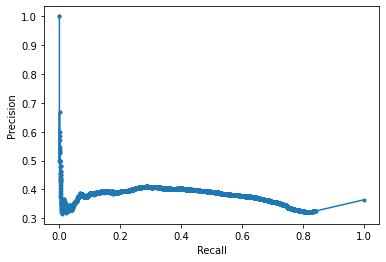

In [6]:
plt.figure()
lr_precision, lr_recall, _ = precision_recall_curve(lb_test, yPredProb)
plt.plot(lr_recall, lr_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# **Q3.3.2 & Q3.3.3**

In [5]:
exit(0)

In [ ]:
!python Q3.py

In [7]:
from Q3 import svm_classifier, negative_mining
from hw4_utils import get_pos_and_random_neg, generate_result_file
from detect import prepare_second_stream
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Use the negative mining function developed in the Q3.py

In [4]:
modelnegmin, objs, aps = negative_mining(10, 10, 0.3, 2000, -1, 1000)
print(objs)
print(aps)

100%|██████████| 1000/1000 [00:57<00:00, 17.26it/s]


Loop0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 83%|████████▎ | 830/1000 [09:14<01:54,  1.48it/s]

Loop1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)

 22%|██▎       | 225/1000 [02:47<09:50,  1.31it/s]

Loop2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<13:06,  1.27it/s]

  0%|          | 2/1000 [00:01<12:59,  1.28it/s]

  0%|          | 3/1000 [00:02<12:54,  1.29it/s]

  0%|          | 4/1000 [00:03<13:21,  1.24it/s]

  0%|          | 5/1000 [00:04<13:29,  1.23it/s]

  1%|          | 6/1000 [00:04<13:36,  1.22it/s]

  1%|          | 7/1000 [00:05<13:38,  1.21it/s]

  1%|          | 8/1000 [00:06<14:05,  1.17it/s]

  1%|          | 9/1000 [00:07<13:48,  1.20it/s]

  1%|          | 10/1000 [00:08<13:46,  1.20it/s]

  1%|          | 11/1000 [00:09<13:46,  1.20it/s]

  1%|          | 12/1000 [00:09<13:33,  1.21it/s]

  1%|▏         | 13/1000 [00:10<13:25,  1.23it/s]

  1%|▏         | 14/1000 [00:11<13:22,  1.23it/s]

  2%|▏         | 15/1000 [00:12<13:06,  1.25it/s]


Loop3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



  0%|          | 0/1000 [00:00<?, ?it/s]


  0%|          | 1/1000 [00:00<13:08,  1.27it/s]


  0%|          | 2/1000 [00:01<12:40,  1.31it/s]


  0%|          | 3/1000 [00:02<12:39,  1.31it/s]


  0%|          | 4/1000 [00:02<12:26,  1.34it/s]


  0%|          | 5/1000 [00:03<12:32,  1.32it/s]


  1%|          | 6/1000 [00:04<12:20,  1.34it/s]


  1%|          | 7/1000 [00:05<12:12,  1.36it/s]


  1%|          | 8/1000 [00:05<12:04,  1.37it/s]


  1%|          | 9/1000 [00:06<12:14,  1.35it/s]


  1%|          | 10/1000 [00:07<12:17,  1.34it/s]


  1%|          | 11/1000 [00:08<12:30,  1.32it/s]


  1%|          | 12/1000 [00:09<12:40,  1.30it/s]


  1%|▏         | 13/1000 [00:09<12:32,  1.31it/s]


  1%|▏         | 14/1000 [00:10<12:15,  1.34it/s]


  2%|▏         | 15/1000 [00:11<12

Loop4


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




  0%|          | 0/1000 [00:00<?, ?it/s]



  0%|          | 1/1000 [00:01<17:34,  1.06s/it]



  0%|          | 2/1000 [00:02<17:10,  1.03s/it]



  0%|          | 3/1000 [00:03<17:21,  1.04s/it]



  0%|          | 4/1000 [00:04<16:59,  1.02s/it]



  0%|          | 5/1000 [00:05<16:37,  1.00s/it]



  1%|          | 6/1000 [00:06<16:24,  1.01it/s]



  1%|          | 7/1000 [00:06<16:09,  1.02it/s]



  1%|          | 8/1000 [00:07<15:51,  1.04it/s]



  1%|          | 9/1000 [00:08<15:51,  1.04it/s]



  1%|          | 10/1000 [00:09<16:23,  1.01it/s]



  1%|          | 11/1000 [00:11<16:58,  1.03s/it]



  1%|          | 12/1000 [00:12<16:59,  1.03s/it]



  1%|▏         | 13/1000 [00:13<16:37,  1.01s/it]



  1%|▏         | 14/1000 [00:13<16:25,  1.00it/s]



  2%|▏         | 1

Loop5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)





  0%|          | 0/1000 [00:00<?, ?it/s]




  0%|          | 1/1000 [00:00<14:45,  1.13it/s]




  0%|          | 2/1000 [00:01<14:32,  1.14it/s]




  0%|          | 3/1000 [00:02<14:16,  1.16it/s]




  0%|          | 4/1000 [00:03<14:16,  1.16it/s]




  0%|          | 5/1000 [00:04<13:55,  1.19it/s]




  1%|          | 6/1000 [00:05<13:44,  1.21it/s]




  1%|          | 7/1000 [00:05<13:30,  1.23it/s]




  1%|          | 8/1000 [00:06<13:39,  1.21it/s]




  1%|          | 9/1000 [00:07<13:30,  1.22it/s]




  1%|          | 10/1000 [00:08<13:25,  1.23it/s]




  1%|          | 11/1000 [00:09<13:20,  1.24it/s]




  1%|          | 12/1000 [00:09<13:17,  1.24it/s]




  1%|▏         | 13/1000 [00:10<13:05,  1.26it/s]




  1%|▏         | 14/1000 [00:11<13:18,  1.23it/s]




  

Loop6


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)






  0%|          | 0/1000 [00:00<?, ?it/s]





  0%|          | 1/1000 [00:00<13:12,  1.26it/s]





  0%|          | 2/1000 [00:01<12:51,  1.29it/s]





  0%|          | 3/1000 [00:02<12:52,  1.29it/s]





  0%|          | 4/1000 [00:03<12:47,  1.30it/s]





  0%|          | 5/1000 [00:03<12:39,  1.31it/s]





  1%|          | 6/1000 [00:04<12:22,  1.34it/s]





  1%|          | 7/1000 [00:05<12:09,  1.36it/s]





  1%|          | 8/1000 [00:05<12:20,  1.34it/s]





  1%|          | 9/1000 [00:06<12:25,  1.33it/s]





  1%|          | 10/1000 [00:07<12:23,  1.33it/s]





  1%|          | 11/1000 [00:08<12:16,  1.34it/s]





  1%|          | 12/1000 [00:08<12:17,  1.34it/s]





  1%|▏         | 13/1000 [00:09<12:20,  1.33it/s]





  1%|▏         | 14/1000 [00:10<12:17,  1

Loop7


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)







  0%|          | 0/1000 [00:00<?, ?it/s]






  0%|          | 1/1000 [00:00<11:14,  1.48it/s]






  0%|          | 2/1000 [00:01<11:27,  1.45it/s]






  0%|          | 3/1000 [00:02<11:27,  1.45it/s]






  0%|          | 4/1000 [00:02<11:32,  1.44it/s]






  0%|          | 5/1000 [00:03<11:54,  1.39it/s]






  1%|          | 6/1000 [00:04<11:52,  1.40it/s]






  1%|          | 7/1000 [00:04<11:32,  1.43it/s]






  1%|          | 8/1000 [00:05<11:19,  1.46it/s]






  1%|          | 9/1000 [00:06<11:31,  1.43it/s]






  1%|          | 10/1000 [00:07<11:46,  1.40it/s]






  1%|          | 11/1000 [00:07<11:35,  1.42it/s]






  1%|          | 12/1000 [00:08<11:23,  1.45it/s]






  1%|▏         | 13/1000 [00:09<11:12,  1.47it/s]






  1%|▏         | 14/1000 [

Loop8


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)








  0%|          | 0/1000 [00:00<?, ?it/s]







  0%|          | 1/1000 [00:00<14:41,  1.13it/s]







  0%|          | 2/1000 [00:01<14:36,  1.14it/s]







  0%|          | 3/1000 [00:02<14:30,  1.15it/s]







  0%|          | 4/1000 [00:03<14:16,  1.16it/s]







  0%|          | 5/1000 [00:04<14:04,  1.18it/s]







  1%|          | 6/1000 [00:05<14:30,  1.14it/s]







  1%|          | 7/1000 [00:06<14:25,  1.15it/s]







  1%|          | 8/1000 [00:06<14:26,  1.14it/s]







  1%|          | 9/1000 [00:07<14:41,  1.12it/s]







  1%|          | 10/1000 [00:08<14:24,  1.14it/s]







  1%|          | 11/1000 [00:09<14:25,  1.14it/s]







  1%|          | 12/1000 [00:10<14:53,  1.11it/s]







  1%|▏         | 13/1000 [00:11<14:54,  1.10it/s]







  1%|▏     

Loop9


Streaming output truncated to the last 5000 lines.




 12%|█▏        | 115/1000 [01:32<11:46,  1.25it/s]








 12%|█▏        | 116/1000 [01:33<11:48,  1.25it/s]








 12%|█▏        | 117/1000 [01:34<12:10,  1.21it/s]








 12%|█▏        | 118/1000 [01:34<12:05,  1.22it/s]








 12%|█▏        | 119/1000 [01:35<12:25,  1.18it/s]








 12%|█▏        | 120/1000 [01:36<12:41,  1.16it/s]








 12%|█▏        | 121/1000 [01:37<12:23,  1.18it/s]








 12%|█▏        | 122/1000 [01:38<12:09,  1.20it/s]








 12%|█▏        | 123/1000 [01:39<12:06,  1.21it/s]








 12%|█▏        | 124/1000 [01:39<11:42,  1.25it/s]








 12%|█▎        | 125/1000 [01:40<11:42,  1.24it/s]








 13%|█▎        | 126/1000 [01:41<11:36,  1.26it/s]








 13%|█▎        | 127/1000 [01:42<11:38,  1.25it/s]








 13%|█▎        | 128/1000 [01:43<11:40,  1.24it/s]








 13%|█▎        | 129/1000 [01:43<11:31,  1.26it/s]








 13%|█▎        | 130/1000 [01:44<11:24,  1.27it/s]








 

[11611.35354617226, 12357.70111757081, 10281.525429469635, 4783.134301161828, 6169.362037310963, 5502.356470996232, 7019.5982399351, 8302.850661484898, 8761.141403999958, 9616.443523365764]
[0.6748206864948809, 0.6762084166325624, 0.6388677664309165, 0.3856560385780741, 0.46227161452208493, 0.4612493015752756, 0.538632757564646, 0.6036055377593832, 0.6003436477272743, 0.5391159226470801]


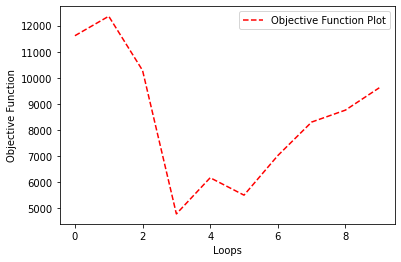

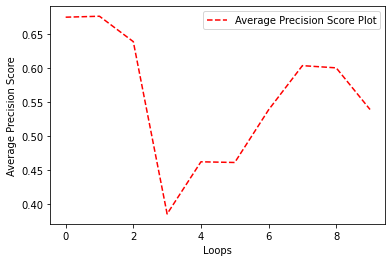

In [5]:
plt.plot(np.arange(np.size(objs)), objs, 'r--')
plt.legend(['Objective Function Plot'])
plt.xlabel('Loops')
plt.ylabel('Objective Function')
plt.show()
plt.plot(np.arange(np.size(aps)), aps, 'r--')
plt.legend(['Average Precision Score Plot'])
plt.xlabel('Loops')
plt.ylabel('Average Precision Score')
plt.show()

# **Q3.3.4**

In [8]:
feat_extractor = prepare_second_stream()
generate_result_file(feat_extractor, modelnegmin, 'test', -1)

Streaming output truncated to the last 5000 lines.









 69%|██████▉   | 1130/1629 [17:36<07:32,  1.10it/s]









 69%|██████▉   | 1131/1629 [17:37<07:21,  1.13it/s]









 69%|██████▉   | 1132/1629 [17:37<07:25,  1.11it/s]









 70%|██████▉   | 1133/1629 [17:38<07:26,  1.11it/s]









 70%|██████▉   | 1134/1629 [17:39<07:29,  1.10it/s]









 70%|██████▉   | 1135/1629 [17:40<08:03,  1.02it/s]









 70%|██████▉   | 1136/1629 [17:41<08:15,  1.01s/it]









 70%|██████▉   | 1137/1629 [17:42<07:54,  1.04it/s]









 70%|██████▉   | 1138/1629 [17:43<07:35,  1.08it/s]









 70%|██████▉   | 1139/1629 [17:44<07:29,  1.09it/s]









 70%|██████▉   | 1140/1629 [17:45<07:18,  1.11it/s]









 70%|███████   | 1141/1629 [17:46<07:02,  1.15it/s]









 70%|███████   | 1142/1629 [17:47<07:03,  1.15it/s]









 70%|███████   | 1143/1629 [17:48<07:11,  1.13it/s]









 70%|███████   | 1144/1629 [17:48<07:06,  1.14it/s]









 70%|███████   | 1145/162

Results have been saved to result.npy


In [ ]:
rects = np.load("result.npy", allow_pickle=True).item()
print(rects)